# Results

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

In [3]:
df = pd.read_csv('/home/matteo/uniTN/hpc/results/result-summary.csv', index_col=False)
del df['id']
df['processing_time'] = df['average_time_per_hour'] - df['average_saving_time_per_hour']
df_grouped = df.groupby(['number_of_processes', 'process_per_node'], as_index=False).mean()

In [3]:
df

,number_of_processes,process_per_node,io_time,permutation_time,distribution_operations_time,average_time_per_hour,average_saving_time_per_hour,processing_time
0,2,2,17.905680,0.185309,0.297120,6.304137,2.539805,3.467212
1,8,8,15.409016,0.149366,0.629955,3.396460,2.286552,0.479953
2,16,1,17.623056,0.075454,1.099011,4.994602,3.986656,-0.091065
3,2,1,16.627838,0.104976,0.238009,6.127892,2.448358,3.441525
4,16,1,17.581821,0.113239,1.062844,4.086065,3.133337,-0.110116
...,...,...,...,...,...,...,...,...
59,2,2,17.597085,0.109079,0.247957,6.916804,2.791526,3.877321
60,1,1,16.181434,0.151088,0.150095,9.095890,2.500659,6.445136
61,4,4,16.711130,0.131223,0.434253,4.274907,2.432093,1.408561
62,8,8,16.191819,0.237373,1.048283,5.502814,3.729833,0.724698


In [4]:
df_grouped

,number_of_processes,process_per_node,io_time,permutation_time,distribution_operations_time,average_time_per_hour,average_saving_time_per_hour,processing_time
0,1,1,16.382981,0.114016,0.149563,9.243931,2.547652,6.696280
1,2,1,16.397887,0.114100,0.230685,5.970368,2.433403,3.536965
2,2,2,17.045681,0.127312,0.248716,6.273050,2.550325,3.722726
3,4,1,16.382257,0.115347,0.478246,5.822274,2.461477,3.360797
4,4,4,16.492078,0.123536,0.441856,4.313280,2.465639,1.847641
5,8,1,16.292553,0.122621,0.673217,4.443676,2.695768,1.747908
6,8,8,17.124704,0.116734,0.649996,4.709819,3.594429,1.115390
7,16,1,17.385411,0.120282,1.094074,4.171899,3.357636,0.814264
8,16,16,16.498197,0.107607,1.082607,3.515121,2.813031,0.702090


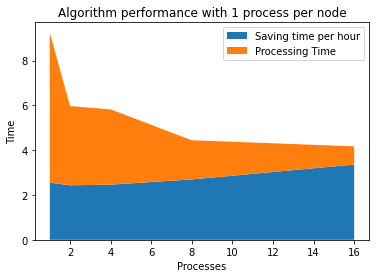

In [11]:
df_grouped_only_multiple_nodes = df_grouped[np.logical_or(df_grouped["number_of_processes"] != df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]
fig, ax = plt.subplots()
ax.stackplot(df_grouped_only_multiple_nodes["number_of_processes"], [df_grouped_only_multiple_nodes["average_saving_time_per_hour"], df_grouped_only_multiple_nodes["processing_time"]],
             labels=["Saving time per hour", "Processing Time"])
ax.legend(loc='upper right')
ax.set_title('Algorithm performance with 1 process per node')
ax.set_xlabel('Processes')
ax.set_ylabel('Time')

plt.show()

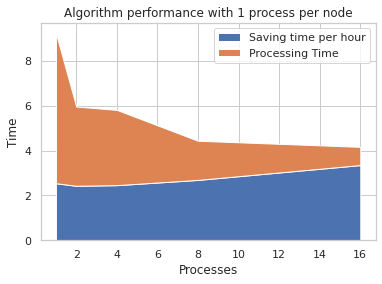

In [12]:
sns.set_theme(style="whitegrid")

df_grouped_only_multiple_nodes = df_grouped[np.logical_or(df_grouped["number_of_processes"] != df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]
fig, ax = plt.subplots()
ax.stackplot(df_grouped_only_multiple_nodes["number_of_processes"], [df_grouped_only_multiple_nodes["average_saving_time_per_hour"], df_grouped_only_multiple_nodes["processing_time"]],
             labels=["Saving time per hour", "Processing Time"])
ax.legend(loc='upper right')
ax.set_title('Algorithm performance with 1 process per node')
ax.set_xlabel('Processes')
ax.set_ylabel('Time')

plt.show()

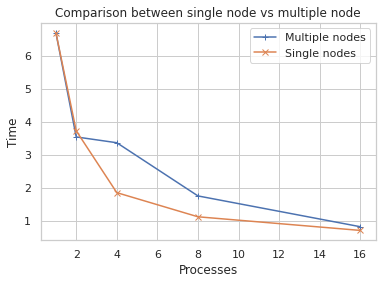

In [15]:
df_grouped_only_multiple_nodes = df_grouped[np.logical_or(df_grouped["number_of_processes"] != df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]
df_grouped_only_single_nodes = df_grouped[np.logical_or(df_grouped["number_of_processes"] == df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]

fig, ax = plt.subplots()
ax.plot(df_grouped_only_multiple_nodes["number_of_processes"], df_grouped_only_multiple_nodes["processing_time"], marker="+", label="Multiple nodes")
ax.plot(df_grouped_only_single_nodes["number_of_processes"], df_grouped_only_single_nodes["processing_time"], marker="x", label="Single nodes")

ax.legend(loc='upper right')
ax.set_title('Comparison between single node vs multiple node')
ax.set_xlabel('Processes')
ax.set_ylabel('Time')

plt.show()

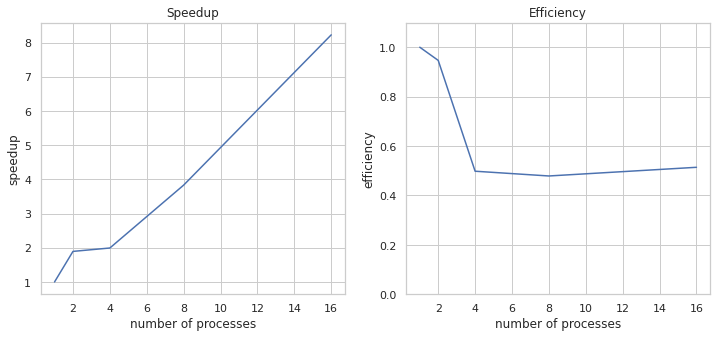

In [25]:
single_process_processing_time = df_grouped[df_grouped["number_of_processes"] == 1].loc[0]['processing_time']
data = []


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  

# plot speedup
x = df_grouped[np.logical_or(df_grouped["number_of_processes"] != df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]["number_of_processes"]
y = single_process_processing_time / (df_grouped[np.logical_or(df_grouped["number_of_processes"] != df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]['processing_time'])
ax1.plot(x, y)
ax1.set_title('Speedup')

ax1.set_xlabel('number of processes')
ax1.set_ylabel('speedup')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# plot efficiency
y = y/x
ax2.plot(x, y)
ax2.set_title('Efficiency')

ax2.set_ylim(0, 1.1)
ax2.set_xlabel('number of processes')
ax2.set_ylabel('efficiency')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

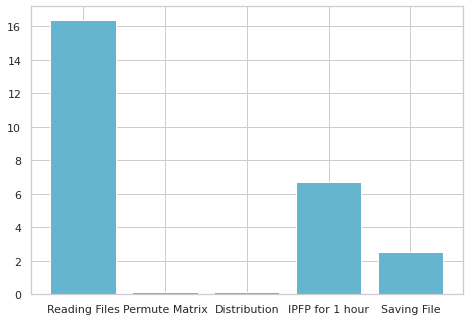

In [31]:
process_row = df_grouped[df_grouped["number_of_processes"] == 1].loc[0]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_labels = ['Reading Files', 'Permute Matrix', 'Distribution', 'IPFP for 1 hour', 'Saving File']
bar_height = [process_row['io_time'],process_row['permutation_time'],process_row['distribution_operations_time'],process_row['processing_time'],process_row['average_saving_time_per_hour']]
ax.bar(bar_labels,bar_height, color='c')
plt.show()